In [1]:
import sys
import numpy as np
import holidays
sys.path.append('../') 
from model import data_preparation as prep
import time

# Get Some Data

In [2]:
con = prep.create_connection()
t = time.time()
x_train_adjusted, y_train_adjusted, x_test_adjusted, y_test_adjusted = prep.prepare_data(con,1)
print(time.time()-t)

37.13093113899231


# Arrange Data to have List of training instances

In [3]:
for k in x_train_adjusted.keys():
    print(x_train_adjusted[k])
    break

[[7.236339342754344, numpy.datetime64('2015-01-01T00:00:00.000000000'), 1, 1, 4, 261, 8271502365835050859, 15, '01058', True, True, True], [7.236339342754344, numpy.datetime64('2015-01-01T01:00:00.000000000'), 1, 1, 4, 261, 8271502365835050859, 15, '01058', True, True, True], [7.236339342754344, numpy.datetime64('2015-01-01T02:00:00.000000000'), 1, 1, 4, 261, 8271502365835050859, 15, '01058', True, True, True], [7.236339342754344, numpy.datetime64('2015-01-01T03:00:00.000000000'), 1, 1, 4, 261, 8271502365835050859, 15, '01058', True, True, True], [7.236339342754344, numpy.datetime64('2015-01-01T04:00:00.000000000'), 1, 1, 4, 261, 8271502365835050859, 15, '01058', True, True, True], [7.236339342754344, numpy.datetime64('2015-01-01T05:00:00.000000000'), 1, 1, 4, 261, 8271502365835050859, 15, '01058', True, True, True], [7.207118856207756, numpy.datetime64('2015-01-01T06:00:00.000000000'), 1, 1, 4, 261, 8271502365835050859, 15, '01058', True, True, True], [7.207118856207756, numpy.datetim

In [ ]:
x_train_adjusted = np.array([x_train_adjusted[k] for k in sorted(x_train_adjusted.keys())])
x_train_adjusted = x_train_adjusted.reshape(-1,9)
x_test_adjusted = np.array([x_test_adjusted[k] for k in sorted(x_test_adjusted.keys())])
x_test_adjusted = x_test_adjusted.reshape(-1,9)
y_test_adjusted = np.array([y_test_adjusted[k] for k in sorted(y_test_adjusted.keys())])
y_test_adjusted = y_test_adjusted.reshape(-1,1)
y_train_adjusted = np.array([y_train_adjusted[k] for k in sorted(y_train_adjusted.keys())])
y_train_adjusted = y_train_adjusted.reshape(-1,1)


# normalize price MinMax

In [9]:
maxValue =y_train_adjusted[:,0].max()
x_train_adjusted = x_train_adjusted.astype(float)
x_test_adjusted = x_test_adjusted.astype(float)
x_train_adjusted[:,0] *=1/maxValue
x_test_adjusted[:,0] *=1/maxValue
y_test_adjusted[:,0] *=1/maxValue
y_train_adjusted[:,0] *=1/maxValue

In [10]:
x_train_adjusted[0]

array([  9.87099304e-01,   1.42007040e+18,   9.00000000e+00,
         3.06000000e+03,  -8.08779066e+18,   3.10300000e+10,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00])

In [11]:
x_train_adjusted = np.array(x_train_adjusted)
x_test_adjusted = np.array(x_test_adjusted)
#x_train_adjusted = x_train_adjusted.reshape(x_train_adjusted.shape + (1, ))
#x_test_adjusted = x_test_adjusted.reshape(x_test_adjusted.shape + (1, ))

# fitting lasso regression model

seems to fit best our problem with a penalty value of 1e^-6

0.825073420185


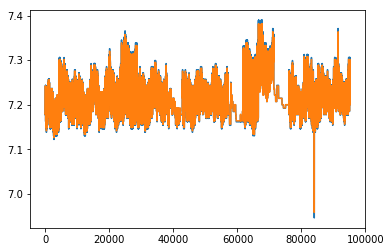

In [12]:
from sklearn import linear_model
import matplotlib.pyplot as plt
clf = linear_model.LassoLars(0.0000001)
clf.fit (x_train_adjusted, y_train_adjusted)
print(clf.score(x_test_adjusted , y_test_adjusted))

plt.plot(np.exp(y_test_adjusted*maxValue))
plt.plot(np.exp(clf.predict(x_test_adjusted)*maxValue))
plt.show()

In [13]:
x_test_adjusted

array([[  9.82993839e-01,   1.48856760e+18,   3.06000000e+03, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  9.82993839e-01,   1.48857120e+18,   3.06000000e+03, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  9.82993839e-01,   1.48857480e+18,   3.06000000e+03, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       ..., 
       [  9.85592077e-01,   1.50567840e+18,   1.46950000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.84566057e-01,   1.50568200e+18,   1.46950000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.84566057e-01,   1.50568560e+18,   1.46950000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [14]:

from sklearn.metrics import mean_squared_error
mean_squared_error(np.exp(y_test_adjusted*maxValue), np.exp(clf.predict(x_test_adjusted*maxValue)))

0.11009614555954936